# < 10. 인공지능으로 세상에 없던 새로운 패션 만들기 > 

## 10.1 들어가며
### 학습전제
- Convolution의 padding, stride 등의 기본 개념을 알고 있다.
- 교차 엔트로피(Cross Entropy) 등의 손실 함수, 최적화 함수 등 딥러닝의 기본적인 학습 알고리즘을 알고 있다.
- 텐서플로우를 활용해 신경망을 학습시키는 코드를 다뤄본 적이 있다.
- 간단한 판별 모델링(분류, 회귀 등)의 개념을 알고, 실습해 본 적이 있다.
### 학습목표
- 생성 모델링 개념을 이해하며 판별 모델링과의 차이 알기
- Pix2Pix, CycleGAN 등의 이미지 관련 다양한 생성 모델링의 응용을 접하며 흥미 가지기
- Fashion MNIST 데이터셋의 의미를 알기
- 생성적 적대 신경망(GAN)의 구조와 원리를 이해하기
- 텐서플로우로 짠 DCGAN 학습 코드를 익히며 응용하기
### 목차
1. 없던 데이터를 만들어낸다, 생성 모델링
2. 여러 가지 생성 모델링 기법과 친해지기
3. 패션을 디자인하려면? 먼저 패션을 배워야지!
4. 그림을 만들어내는 화가 생성자(Generator), 그리고 평가하는 비평가 구분자(Discriminator)
5. 생성 모델이 똑똑해지기 위한 기나긴 여정

---

## 10.2 없던 데이터를 만들어낸다, 생성 모델링

- 판별 모델링
    - 이전 인공지능과 가위바위보 하기 프로젝트에서는 직접 가위,바위,보에 해당하는 사진을 찍어 데이터셋을 만들고, 각 이미지를 알맞은 카테고리로 분류 할 수 있도록 학습시켰는데 이런 모델을 판별 모델링이라고 부른다
    - 입력받은 데이터를 어떤 기준에 대해 판별하는 것이 목표인 모델링
    - 입력된 데이터셋을 특정 기준에 따라 분류하거나, 특정 값을 맞추는 모델
- 생성 모델링
    - 없던 데이터를 생성해 내는 것이 목표다
    - 학습한 데이터셋과 비슷하면서도 기존에는 없던 새로운 데이터셋을 생성하는 모델로 정리할 수 있습니다.

---

## 10.3 여러 가지 생성 모델링 기법과 친해지기 (1) Pix2Pix

### 그림을 사진으로  변환해 보자 : Pix2Pix

- Pix2Pix는 간단한 이미지를 입력할 경우 실제 사진처럼 보이도록 바꿔줄 때 많이 사용되는 모델이다. 
- 모델은 아래 그림처럼 단순화된 이미지(Input Image)와 실제 이미지(Ground Truth)가 쌍을 이루는 데이터셋으로 학습을 진행한다.
- 왼쪽의 Input Image를 입력받으면, 내부 연산을 통해 실제 사진 같은 형상으로 변환된 Predicted Image를 출력하는 거다.
- 학습 초기에는 모델이 생성한 Predicted Image가 Ground Truth 이미지와 많이 다르겠지만, 계속해서 Ground Truth와 얼마나 비슷한지를 평가하며 점차 실제 같은 결과물을 만들어 내게 된다
- 이렇게 한 이미지를 다른 이미지로 픽셀 단위로 변환한다는 뜻의 Pixel to Pixel을 딴 Pix2Pix로 이름이 붙게 되었다
- https://arxiv.org/pdf/1611.07004.pdf

![](https://d3s0tskafalll9.cloudfront.net/media/images/pix2pix.max-800x600.png)

---

## 10.4 여러 가지 생성 모델링 기법과 친해지기 (2) CycleGAN

### 모네의 그림을 사진으로, 사진을 다시 모네의 그림으로:CycleGAN

- 한 방향으로의 변환만 가능한 Pix2Pix와 달리 CycleGAN은 양방향으로의 이미지 변환이 가능하다. 즉 실사 이미지를 그림으로 바꾸는 것과 그림을 실사 이미지로 바꾸는 것 두가지가 모두 가능한거다
- 그림과 사진의 쌍으로 이루어진 데이터셋이 필요한 Pix2Pix와 달리, CycleGAN은 쌍이 필요없다. 
- 다음과 같이 얼룩말을 그냥 말로, 말을 얼룩말로 서로 변환할 경우 쌍을 이루지 않더라도 그냥 얼룩말이 있는 사진과 말이 있는 사진 각각의 데이터셋만 있다면 CycleGAN을 학습시킬 수 있다. 모델이 스스로 얼룩말과 말 데이터에서 각각의 스타일을 학습해서 새로운 이미지에 그 스타일을 입힐 수 있ㄷ록 설계되었기 때문
- 딥러닝에서 쌍으로 된 데이터(paired data)가 필요 없다는 것은 데이터를 구하기 훨씬 쉽고, 라벨을 붙이는 주석(annotation) 비용이 필요 없다는 것을 뜻하니, 굉장히 큰 장점

![](https://d3s0tskafalll9.cloudfront.net/media/images/CycleGAN.max-800x600.png)

- CycleGAN의 또 다른 유명한 활용 사례는 바로 실제 사진을 모네 또는 고흐 같은 화가가 그린 그림처럼 바꾸는 것
- 하나의 사진만으로도 모네가 그린 그림, 고흐가 그린 그림 등으로 마음대로 변환 시켜 볼 수 있다

![](https://d3s0tskafalll9.cloudfront.net/media/images/CycleGAN2.max-800x600.jpg)

### 정리
- Pix2Pix는 한 방향으로의 변환만 가능하지만, CycleGAN은 양방향으로의 변환을 할 수 있다.
- Pix2Pix는 입력 데이터와 출력 데이터끼리 쌍으로 이루어진 데이터셋이 필요하지만, CycleGAN은 필요 없다.

---

## 10.5 여러 가지 생성 모델링 기법과 친해지기 (3) Neural Style Transfer

### 사진에 내가 원하는 스타일을 입혀보자 : Neural Style Transfer
- 이 기법은 이미지의 스타일을 변환시킨다.
- 전체 이미지의 구성을 유지하고 싶은 Base Image와 입히고 싶은 스타일이 담긴 Style Image 두 장을 활용해 새로운 이미지를 만들어 내는 것

![](https://d3s0tskafalll9.cloudfront.net/media/images/StyleTransfer.max-800x600.png)

---

## 10.6 패션을 디자인하려면? 먼저 패션을 배워야지! (1)

### Fashion MNIST

- 모델이 학습할 데이터셋을 먼저 준비
- 사용할 데이터셋은 Fashion MNIST
    - 10가지 패션 카테고리가 0~9의 숫자 Label로 표시되었다.
        - 0: T-shirt/top
        - 1: Trouser
        - 2: Pullover
        - 3: Dress
        - 4: Coat
        - 5: Sandal
        - 6: Shirt
        - 7: Sneaker
        - 8: Bag
        - 9: Ankle boot

---

## 10.7 패션을 디자인하려면? 먼저 패션을 배워야지! (2) 코드로 살펴보기

In [3]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.6.0


- fashion_mnist 데이터는 우리가 인터넷에서 따로 다운로드할 필요 없이,tf.keras 안에 있는 datasets에 이미 들어가 있어서 꺼내기만 하면 된다
- 이번에는 분류 문제에서와 달리, 각 이미지가 어떤 카테고리인지 나타내주는 라벨이 필요 없다.

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, _), (test_x, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


- 28x28 픽셀의 이미지로, 각 픽셀은 0~255 사이의 정숫값을 가진다

In [10]:
train_x.shape

(60000, 28, 28)

In [11]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


- 이번 프로젝트에서는 각 픽셀을 -1, 1로 정규화시켜서 사용할 예정이므로, 중간값을 0으로 맞춰주기 위해 127.5를 뺀 후 127.5로 나눠준다

In [12]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


- CNN(합성곱) 계층을 다룰 때 배웠듯, 딥러닝에서 이미지를 다루려면 채널 수에 대한 차원이 필요하다. Fashion MNIST 데이터는 흑백 이미지이므로, 채널 값은 1이다

In [13]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
train_x.shape

(60000, 28, 28, 1)

#### 확인

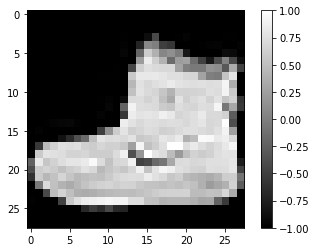

In [14]:
plt.imshow(train_x[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

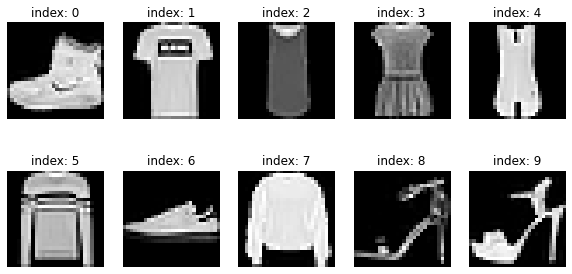

In [18]:
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_x[i].reshape(28,28), cmap='gray')
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show

- plt.figure(figsize=(10, 5))
    - 이미지 전체 프레임의 크기를 결정
- plt.subplot(row, col, index)
    - 여러 개의 이미지를 한 번에 띄우고 싶을 때
    - 10개의 이미지를 2x5 배열 형태로 보고 싶은 경우 plt.subplot(2, 5, index)
- plt.title('title')
    - 이미지에 제목으로 라벨 값을 넣어준다
- plt.axis('off)
    - 불필요한 축을 지워서 깔끔하게 나타낸다

#### for 문을 활용해서 이미지 25개를 5x5 의 배열로 띄워보기. 단, 모든 이미지는 train_images에서 랜덤으로 추출

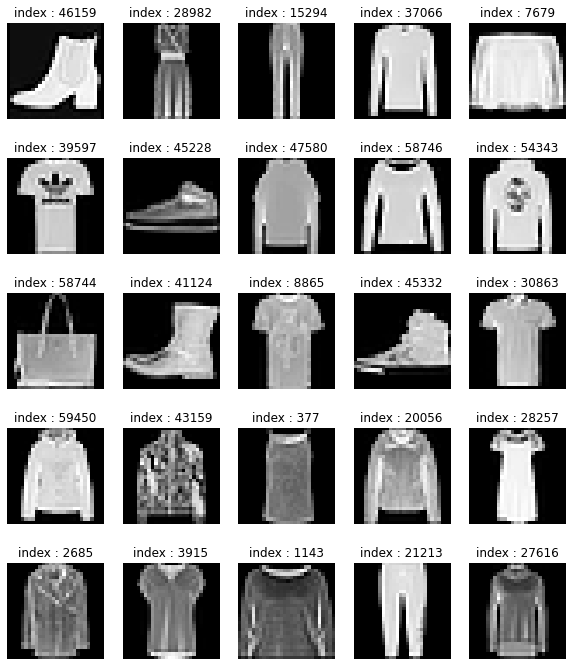

In [19]:
plt.figure(figsize=(10,12))

for i in range(25):
    plt.subplot(5,5, i+1)
    random_index = np.random.randint(1,60000)
    plt.imshow(train_x[random_index].reshape(28,28), cmap='gray')
    plt.title(f'index : {random_index}')
    plt.axis('off')
plt.show()

#### 텐서플로우의 Dataset을 이용해 준비
- https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle

In [20]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

- BUFFER_SIZE : 전체 데이터를 섞기 위해 60000으로 설정
- BATCH_SIZE : 모델이 한 번에 학습할 데이터의 양
    - 너무 많은 양을 한 번에 학습시키면 메모리 활용 면에서도 비효율적이고, 한 번 학습을 하는 데에도 오래 걸리므로 적절한 사이즈로 잘라서 학습을 진행한다
    - 이러한 방식을 미니 배치 학습 이라고 한다

In [21]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

#### tf.data.Dataset.from_tensor_slices()
- 리스트, 넘파이, 또는 텐서플로우의 텐서 자료형에서 데이터셋을 만들 수 있다
- train_x라는 넘파이 배열(numpy ndarray)형 자료를 섞고, 이를 배치 사이즈에 따라 나누도록 한다
- 데이터가 잘 섞이게 하기 위해서는 버퍼 사이즈를 총 데이터 사이즈와 같거나 크게 설정하는 것이 좋다

---

## 10.8 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (1) GAN 이해하기

### GAN 이란
- Generative Adversarial Network 으로 생성 모델 중 하나이다
- <mark>생성자(Generator)</mark>  :  아무 의미 없는 랜덤 노이즈로부터 신경망에서의 연산을 통해 이미지 형상의 벡터를 생성해 낸다. 즉, 무에서 유를 창조하는 것과 같은 역할을 한다
- <mark>판별자(Discriminator)</mark> : 기존에 있던 진자 이미지와 생성자가 만들어낸 이미지를 입력받아 각 이미지가 Real인지 , Fake 인지에 대한 판단 정도를 실숫값으로 출력
    - Generative Model : 위조지폐를 만들어내는 팀
    - Discriminative Model : 위조 지폐범을 잡아내는 경찰
    - 위조지폐를 만들어내는 팀은 잡히지 않기 위해 더 진짜 같은 지폐를 만들려고 하며, 그것을 잡아내려는 경찰은 끊임없이 진짜 지폐와 위조지폐를 구분하려고 한다. 즉, 서로 간의 경쟁이 둘 모두를 성장하게 한다. 궁극적인 목표는 진짜 지폐와 구분될 수 없는 위조지폐를 만들어 내는 것이다.
![](https://d3s0tskafalll9.cloudfront.net/media/images/GAN.max-800x600.png)

### GAN과 생성 모델 다시 정리하기

- GAN 중 특히 합성곱 층(Convolutional Layer)으로 이루어진 딥러닝 모델을 DCGAN (Deep Convolutional GAN) 이라고 한다.
    - Input : 100 random numbers drawn from a uniform distribution (called as a code, or latent variables)
    - Output : an image (in this case 64x64x3 images)

---

## 10.9 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (2) 생성자 구현하기

- GAN에는 생성자, 판별자 모델 두 개가 있다
- 구현해 볼 모델은 DCGAN(Depp Convolutional GAN)

In [22]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((7, 7, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

#### <mark>Conv2DTranspose </mark>
- 일반적인 Conv2D와 반대로 이미지 사이즈를 넓혀주는 층이다
- 이 모델에서는 세 번의 Conv2DTranspose 층을 이용해 (7, 7, 256) → (14, 14, 64) → (28, 28, 1) 순으로 이미지를 키워나간다
- 여기서 최종 사이즈인 (28, 28, 1)은 우리가 준비했던 데이터셋과 형상이 동일
| Conv 타입 | 연산 | 0 삽입 | 패딩 |  스트라이드 | 아웃풋 사이즈 |
| --------- | ---- | ------ | ---- | ---------- | ---------- |
| 일반적 | 다운 샘플링(size 감소) | 0 | p | s | (i+2p-k) / s + 1 |
| Transposed | 업 샘플링(size 증가) | s-1 | k-p+1 | 1 | (i-1)* s + k - 2p |
- https://velog.io/@hayaseleu/Transposed-Convolutional-Layer%EC%9D%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EA%B0%80

#### <mark>BatchNormalization</mark>
- 신경망의 가중치가 폭발하지 않도록 가중치 값을 정규화시켜준다

#### <mark>LeakyReLU</mark>
- ReLU와 동일하나 x < 0 인 값에 대해서 0.01을 곱하여 ReLU함수의 단점을 보완

#### <mark>tanh</mark>
- -1 ~ 1 이내의 값으로 픽셀 값을 정규화시켰던 데이터셋과 동일하게 하기 위함

1. 생성자의 입력 벡터는 어떤 형태입니까?
    - 모델은 입력값으로 (batch_size, 100) 형상의 노이즈 벡터를 받는다.
2. 처음 입력된 벡터는 어떤 레이어를 지나며, 첫 레이어를 지난 후의 shape는 어떤 형태입니까?
    -  7 x 7 x 256 = 12544개의 노드를 가진 첫 번째 Dense 레이어를 거치며 (batch_size, 12544) 형상의 벡터가 된다
3. 첫 번째 레이어를 지난 후 벡터는 어떤 층을 지나게 됩니까? 이 레이어는 왜 필요합니까?
    - 첫 번째 레이어를 지난 후 벡터는 Reshape 레이어를 지나게 된다.
    - 이는 이후의 Layer에서 Convolutional 연산을 할 수 있도록 1차원 벡터를 (7, 7, 256) 형상의 3차원 벡터로 변환시키는 작업

In [23]:
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

- shape=(1, 100)의 형상을 가지는 랜덤 노이즈 벡터를 생성해서 결과물을 한번 만들어 보도록 하자

In [24]:
noise = tf.random.normal([1, 100])

- 단, 지금은 학습하는 중이 아니니 training=False를 설정해 주어야 한다! Batch Normalization 레이어는 훈련 시기와 추론(infernce) 시기의 행동이 다르기 때문에 training=False을 주어야 올바른 결과를 얻을 수 있다

In [25]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 28, 28, 1])

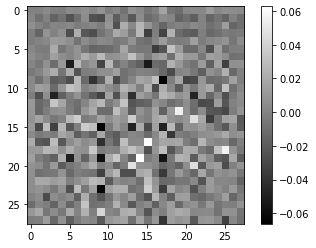

In [26]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.colorbar()
plt.show()

---

## 10.10 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (3) 판별자 구현하기

In [27]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

#### <mark>make_discriminator_model()</mark>
- 판별자는 Conv2D층으로 이미지의 크기를 점점 줄여나간다
- 첫 번째 Conv2D 층에서 입력된 [28, 28, 1] 사이즈의 이미지는 다음 층을 거치며 (28, 28, 1) → (14, 14, 64) → (7, 7, 128)까지 줄어들게 된다
- 마지막에는 Flatten 층을 사용해 3차원 이미지를 1차원으로 쭉 펴서 7x7x128=6272, 즉 (1, 6272) 형상의 벡터로 변환
    - 이는 생성자의 Reshape 층에서 1차원 벡터를 3차원으로 변환했던 것과 정확히 반대 역할
-  1차원 벡터로 변환한 후에는 마지막 Dense Layer를 거쳐 단 하나의 값을 출력하게 된다

In [28]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [29]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00155355]], dtype=float32)>

---

## 10.11 생성 모델이 똑똑해지기 위한 기나긴 여정 (1) 손실함수와 최적화 함수

### 손실함수(loss function)
- GAN은 손실함수로 교차 엔트로피(Cross Entropy)를 사용
- 교차 엔트로피는 분류 모델을 설계할 때 많이 사용하는 손실함수
- 판별자는 한 개의 이미지가 가짜인지 진짜인지를 나타내는 2개 클래스 간 분류 문제를 풀어야 하므로, 이진 교차 엔트로피를 사용
-  <code>tf.keras.losses</code> 라이브러리 안

Real Image에 대한 라벨을 1, Fake Image에 대한 라벨을 0으로 두었을 때, 각각의 손실함수를 이용해 정량적으로 달성해야 하는 목표
- 생성자 : 판별자가 Fake Image에 대해 판별한 값, 즉 D(fake_image) 값이 1에 가까워지는 것
- 판별자 : Real Image 판별값, 즉 D(real_image)는 1에, Fake Image 판별값, 즉 D(fake_image)는 0에 가까워지는 것 <br>

다만, 우리가 교차 엔트로피를 계산하기 위해 입력할 값은 판별자가 판별한 값인데, 판별자 모델의 맨 마지막 Layer에는 값을 정규화시키는 sigmoid나 tanh 함수와 같은 활성화 함수가 없다. 즉, 구분자가 출력하는 값은 범위가 정해지지 않아 모든 실숫값을 가질 수 있다

그런데 tf.keras.losses의 BinaryCrossEntropy 클래스는 기본적으로 본인에게 들어오는 인풋값이 0-1 사이에 분포하는 확률값이라고 가정 <br>
따라서 <code>from_logits</code>를 <code>true</code>로 설정해주어야 <code>BinaryCrossEntropy</code>에 입력된 값을 함수 내부에서 sigmoid 함수를 사용해 0~1 사이의 값으로 정규화한 후 알맞게 계산할 수 있다

In [30]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

- <mark>fake_output</mark> : 생성자가 생성한 Fake Image를 구분자에 입력시켜서 판별된 값, 즉 D(fake_image)
- <mark>real_output</mark> : 기존에 있던 Real Image를 구분자에 입력시켜서 판별된 값, 즉 D(real_image)

In [31]:
vector = [[1, 2, 3],
          [4, 5, 6]]

tf.ones_like(vector)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

fake_output과 real_output을 각각 1 또는 0에 비교를 해야 하는데, 어떻게 비교할 수 있을까?
- <mark>tf.ones_like()</mark> 와 <mark>tf.zeros_like()</mark> 함수를 활용

### <a>generator_loss</a>

generator_loss는 fake_output가 1에 가까워지기를 바라므로, 다음과 같이 tf.ones_like와의 교차 엔트로피값을 계산. <br>
즉, cross_entropy(tf.ones_like(fake_output), fake_output) 값은 fake_output이 (Real Image를 의미하는) 1에 가까울수록 작은 값을 가집니다.

In [33]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

### <a>discriminator_loss</a>

반면, discriminator_loss는 real_output 값은 1에 가까워지기를, fake_output 값은 0에 가까워지기를 바라므로, 두 가지 loss값을 모두 계산 <br>
real_output은 1로 채워진 벡터와, fake_output은 0으로 채워진 벡터와 비교

In [34]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### <a>discriminator accuracy</a>
판별자가 real output, fake output을 얼마나 정확히 판별하는지의 accuracy를 계산해 보는 것도 GAN의 학습에서 매우 중요. 특히 두 accuracy를 따로 계산해서 비교해 보는 것이 매우 유용하다. <br>

만약 판별자가 real output과 fake output을 accuracy가 1.0에 가까울 정도로 정확하게 판별해 낸다면 좋은 것일까? 그렇지 않다. 이 경우 생성자가 만들어내는 fake output이 real output과 차이가 많이 나기 때문에 판별자가 매우 쉽게 판별해 내고 있다는 뜻이다. 그래서, real accuracy와 fake accuracy는 초반에는 1.0에 가깝게 나오다가, 서서히 낮아져서 둘 다 0.5에 가까워지는 것이 이상적이다. fake accuracy가 1.0에 더 가깝다면 아직은 생성자가 판별자를 충분히 잘 속이지 못하고 있다는 뜻이다.

In [36]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

### 최적화 함수(optimizer)
- Adam 최적화 기법 활용
- Adam 함수 또한 <code>tf.keras.optimizers</code> 안

In [37]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

- 매번 학습이 어떻게 진행되어가고 있는지를 확인하기 위해 생성자가 생성한 샘플을 확인

In [38]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

---

## 10.12 생성 모델이 똑똑해지기 위한 기나긴 여정 (2) 훈련과정 설계

하나의 미니 배치 당 진행할 <code>train_step</code> 함수를 먼저 만들어야 한다. <br>
학습시킬 훈련 함수 위에 <code>@tf.function</code> 이라는 데코레이터를 붙여서 사용

In [39]:
import numpy as np
import tensorflow as tf

def f(x, y):
    print(type(x))
    print(type(y))
    return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([7, 7])

In [40]:
import numpy as np
import tensorflow as tf

@tf.function    # 위와 동일한 함수이지만 @tf.function 데코레이터가 적용되었습니다.
def f(x, y):
    print(type(x))
    print(type(y))
    return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


<tf.Tensor: shape=(2,), dtype=int64, numpy=array([7, 7])>

In [41]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

#### <mark>train_step()</mark>
1. 입력 데어터 : Real Image 역할을 할 images 한 세트를 입력으로 받음
2. 생성자 입력 노이즈 : generator가 FAKE IMAGE를 생성하기 위한 noise를 images 한 세트와 같은 크기인 BATCH_SIZE 만큼 생성함
3. tf.GradientTape()는 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 with 구문 열기
4. generated_images 생성 : generator가 noise를 입력받은 후 generated_images 생성
5. discriminator 판별 : discriminator가 Real Image인 images와 Fake Image인 generated_images를 각각 입력받은 후 real_output, fake_output 출력
6. loss 계산 : fake_output, real_output으로 generator와 discriminator 각각의 loss 계산
7.  accuracy 계산 : fake_output, real_output으로 discriminator의 정확도 계산

8. gradient 계산 : gen_tape와 disc_tape를 활용해 gradient를 자동으로 계산
9.  모델 학습 : 계산된 gradient를 optimizer에 입력해 가중치 갱신
10. 리턴값 : 이번 스텝에 계산된 loss와 accuracy를 리턴

#### 한 단계씩 학습할 train_step과 함께 일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수

In [42]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

####  loss와 accuracy 그래프

In [43]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

#### chekpoint
- 정기적으로 모델을 저장하기 위해서
- <code>tf.train.Checkpoint</code>를 활용하면 매번 모델을 직접 저장해 주지 않아도, 코드 한 줄로 빠르고 편하게 버전 관리를 할 수 있다
-  optimizer와 생성자, 판별자를 모두 넣어 저장

In [44]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

---

## 10.13 생성 모델이 똑똑해지기 위한 기나긴 여정 (3) 학습 시키기

<mark>train_step</mark> : 한 단계를 학습 <br>
<mark>generate_and_save_images()</mark> : 샘플 이미지를 생성하고 저장 <br>
<mark>draw_train_history()</mark> : 학습 과정을 시각화 <br>
<mark>checkpoint</mark> : 모델 저장


In [45]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [46]:
save_every = 5
EPOCHS = 50

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [47]:
# %%time
# train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

### 학습과정 시각화하기
- 생성했던 샘플 이미지들을 합쳐 GIF 파일, 움짤로 만들어본다
- GIF 파일은 우리가 오래전에 import 해놓았던 imageio 라이브러리를 활용해 만들 수 있다.
- <code>imageio.get_writer</code> 를 활용해 파일을 열고, 거기에 <code>append_data</code>로 이미지를 하나씩 붙여나가는 방식이다

In [ ]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif